<a href="https://colab.research.google.com/github/Tharindu37/NLP_Example/blob/main/01_Making_text_generator_python_using_LSTM_Tensorflow_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text Generation using LSTM

<h5>Two types of text generation</h5>
<ul>
<li>Character based text generation:-Each character of the text is used to train the model and prediction will also result in generation of new characters.</li>
<li>Word based text generation:-Words are converted into tokens which are used to train the model. The model will generate words instead of chracters in the prediction stage.</li>
</ul>

<h5>Mechaincs of the text generation model</h5>
<ul>
<li>The next word of the sequence is predicted using the words that are already present in the sequence.</li>
<li>It is a simple model where spliting the data into training and testing sets is not required. This is because the model will use all the words in the sequence to predict the next word. Just like forecasting.</li>

<h5>The flow of program</h5>
<ul>
<li>Loading data</li>
<li>Preprocessing the data and Tokenizing</li>
<li>Building and fitting the model on data</li>
<li>Evaluate the model</li>
<li>Predicting(Generating the text)</li>
<li>Saving the model for future applications</li>
</ul>

In [1]:
# mounting the drive to read the data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
# reading the data from local google drive
with open('/content/drive/MyDrive/Colab Notebooks/NLP/robert_frost.txt') as story:
  story_data=story.read()

In [4]:
print(story_data)

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference.

Whose woods these are I think I know.   
His house is in the village though;   
He will not see me stopping here   
To watch his woods fill up with snow.   

My little horse must think it queer   
To stop without a farmhouse near   
Between the woods and frozen lake   

In [5]:
# data cleaning process
import re # Regular expressions to use sub function for replacing the useless text from the data
def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [6]:
# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

In [7]:
split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data
print(split_data)

['two roads diverged in a yellow wood,', 'and sorry i could not travel both', 'and be one traveler, long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth;', '', 'then took the other, as just as fair,', 'and having perhaps the better claim,', 'because it was grassy and wanted wear;', 'though as for that the passing there', 'had worn them really about the same,', '', 'and both that morning equally lay', 'in leaves no step had trodden black.', 'oh, i kept the first for another day!', 'yet knowing how way leads on to way,', 'i doubted if i should ever come back.', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence:', 'two roads diverged in a wood, and i—', 'i took the one less traveled by,', 'and that has made all the difference.', '', 'whose woods these are i think i know.   ', 'his house is in the village though;   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow.   ', '', 'my little horse must t

In [8]:
final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)


two roads diverged in a yellow wood
and sorry i could not travel both
and be one traveler long i stood
and looked down one as far as i could
to where it bent in the undergrowth

then took the other as just as fair
and having perhaps the better claim
because it was grassy and wanted wear
though as for that the passing there
had worn them really about the same

and both that morning equally lay
in leaves no step had trodden black
oh i kept the first for another day!
yet knowing how way leads on to way
i doubted if i should ever come back

i shall be telling this with a sigh
somewhere ages and ages hence
two roads diverged in a wood and i—
i took the one less traveled by
and that has made all the difference

whose woods these are i think i know   
his house is in the village though   
he will not see me stopping here   
to watch his woods fill up with snow   

my little horse must think it queer   
to stop without a farmhouse near   
between the woods and frozen lake   
the darkest eveni

In [9]:
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'two roads diverged in a yellow wood', 'and sorry i could not travel both', 'and be one traveler long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth', '', 'then took the other as just as fair', 'and having perhaps the better claim', 'because it was grassy and wanted wear', 'though as for that the passing there', 'had worn them really about the same', '', 'and both that morning equally lay', 'in leaves no step had trodden black', 'oh i kept the first for another day!', 'yet knowing how way leads on to way', 'i doubted if i should ever come back', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence', 'two roads diverged in a wood and i—', 'i took the one less traveled by', 'and that has made all the difference', '', 'whose woods these are i think i know   ', 'his house is in the village though   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow   ', '', 'my little horse must think it queer  

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
#Instantiating the Tokenizer
max_vacab=1000000
tokenizer=Tokenizer(num_words=max_vacab)
tokenizer.fit_on_texts(final_data)

In [12]:
#Getting the total number of words of the data.
word2idx=tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size=len(word2idx)+1 # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

544
{'the': 1, 'to': 2, 'and': 3, 'i': 4, 'a': 5, 'of': 6, 'in': 7, 'he': 8, 'it': 9, 'was': 10, 'them': 11, 'not': 12, 'one': 13, 'as': 14, 'could': 15, 'for': 16, 'be': 17, 'that': 18, 'with': 19, 'by': 20, 'but': 21, 'trees': 22, 'so': 23, 'had': 24, 'you': 25, 'they': 26, 'there': 27, 'on': 28, 'all': 29, 'his': 30, 'some': 31, 'have': 32, 'like': 33, 'too': 34, 'down': 35, 'where': 36, 'then': 37, 'come': 38, 'me': 39, 'go': 40, 'their': 41, 'over': 42, 'would': 43, 'christmas': 44, 'if': 45, 'woods': 46, 'are': 47, 'wind': 48, 'away': 49, 'out': 50, 'from': 51, 'what': 52, 'its': 53, 'took': 54, 'no': 55, 'yet': 56, 'should': 57, 'back': 58, 'think': 59, 'know': 60, 'is': 61, 'see': 62, 'my': 63, 'before': 64, 'when': 65, 'left': 66, 'right': 67, 'do': 68, 'going': 69, 'or': 70, 'id': 71, 'place': 72, 'enough': 73, 'thousand': 74, 'wood': 75, 'both': 76, 'long': 77, 'other': 78, 'having': 79, 'though': 80, 'about': 81, 'way': 82, 'up': 83, 'little': 84, 'must': 85, 'birches': 86,

<h5>Creating n-gram sequences from the sentences</h5>
<ul>
<li>Consider this sentance:['tow roads diverged in a yellow wood']. Here we will use['two roads diverged in a yellow'] to predict ['wood']. This is the basic concept of forecasting which can be applied here to generate text.</li>
<li>An advacement of this will be to use single word or every combination words possible from the sentence to predict the next word. And this is loosely termed as n_gran sequences</li>
<li>The sentence ['two roads diverged in a yellow wood'] will have sequence as [112,113,114,7,5,190,75]</li>
<li>So we will use combinations of words to make our model better</li>
<ul>

<ul>
<li>[112, 113], </li>
<li>[112, 113, 114], </li>
<li>[112, 113, 114, 7], </li>
<li>[112, 113, 114, 7, 5], </li>
<li>[112, 113, 114, 7, 5, 190], </li>
<li>[112, 113, 114, 7, 5, 190, 75]</li>
</ul>

<ul>
<li> We train our model that if 112 comes then it has to predict 113.</li>
<li> If coombination of 112,113, comes then it has to predict 114 and so on.</li>
</ul>

In [13]:
# We will turn the sentences to sequences line by line and create n_gram sequences
input_seq=[]
for line in final_data:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq=token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[112, 113], [112, 113, 114], [112, 113, 114, 7], [112, 113, 114, 7, 5], [112, 113, 114, 7, 5, 190], [112, 113, 114, 7, 5, 190, 75], [3, 191], [3, 191, 4], [3, 191, 4, 15], [3, 191, 4, 15, 12], [3, 191, 4, 15, 12, 192], [3, 191, 4, 15, 12, 192, 76], [3, 17], [3, 17, 13], [3, 17, 13, 193], [3, 17, 13, 193, 77], [3, 17, 13, 193, 77, 4], [3, 17, 13, 193, 77, 4, 194], [3, 115], [3, 115, 35], [3, 115, 35, 13], [3, 115, 35, 13, 14], [3, 115, 35, 13, 14, 116], [3, 115, 35, 13, 14, 116, 14], [3, 115, 35, 13, 14, 116, 14, 4], [3, 115, 35, 13, 14, 116, 14, 4, 15], [2, 36], [2, 36, 9], [2, 36, 9, 195], [2, 36, 9, 195, 7], [2, 36, 9, 195, 7, 1], [2, 36, 9, 195, 7, 1, 196], [37, 54], [37, 54, 1], [37, 54, 1, 78], [37, 54, 1, 78, 14], [37, 54, 1, 78, 14, 197], [37, 54, 1, 78, 14, 197, 14], [37, 54, 1, 78, 14, 197, 14, 198], [3, 79], [3, 79, 199], [3, 79, 199, 1], [3, 79, 199, 1, 117], [3, 79, 199, 1, 117, 200], [201, 9], [201, 9, 10], [201, 9, 10, 202], [201, 9, 10, 202, 3], [201, 9, 10, 202, 3, 203

In [14]:
# getting the maximum length of sequence for padding purpose
max_seq_length=max(len(x) for x in input_seq)
print(max_seq_length)

11


In [15]:
# Padding the sequences and converting them to array
input_seq=np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

[[  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 [  0   0   0 ... 113 114   7]
 ...
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]
 [  0   0   0 ...   5 544  44]]


In [16]:
# Taking xs and labels to train the model.
xs=input_seq[:,:-1] # xs contains every word in sentence except the last on ebecause we are using this value to predict the y value
labels = input_seq[:,-1] # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ", xs)
print("labels: ", labels)

xs:  [[  0   0   0 ...   0   0 112]
 [  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 ...
 [  0   0   0 ... 189  25 543]
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]]
labels:  [113 114   7 ...   5 544  44]


In [17]:
from tensorflow.keras.utils import to_categorical
# one-hot encoding the labels according to the vocab size
# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have
# a single +ve value(i.e 1) for that label and other values will be zero.

ys=to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [19]:
# using the functional APIs of keras to define the model
i=Input(shape=(max_seq_length-1,)) # using 1 less value bacasuse we are preserving the last value for predicted word
x=Embedding(vocab_size, 124)(i)
x=Dropout(0.2)(x)
x=LSTM(520, return_sequences=True)(x)
x=Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1024, activation='relu')(x)
x=Dense(vocab_size, activation='softmax')(x)

model=Model(i,x)

In [20]:
# using the pipeline method of sequential to define a model

# model = Sequential()
# model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
# model.add(Dropout(0.2))
# model.add(LSTM(520, return_sequences=True))
# model.add(Bidirectional(LSTM(340, return_sequences=True)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))

In [26]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary() # we can know about the shape of the model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 124)           67580     
                                                                 
 dropout (Dropout)           (None, 10, 124)           0         
                                                                 
 lstm (LSTM)                 (None, 10, 520)           1341600   
                                                                 
 bidirectional (Bidirection  (None, 10, 680)           2341920   
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 680)               0         
 alMaxPooling1D)                                             

In [27]:
r=model.fit(xs,ys,epochs=200)

Epoch 1/200
38/38 [==============================] - 8s 63ms/step - loss: 0.3471 - accuracy: 0.8881
Epoch 2/200
38/38 [==============================] - 1s 21ms/step - loss: 0.2855 - accuracy: 0.8982
Epoch 3/200
38/38 [==============================] - 1s 22ms/step - loss: 0.2826 - accuracy: 0.8907
Epoch 4/200
38/38 [==============================] - 1s 26ms/step - loss: 0.2705 - accuracy: 0.8940
Epoch 5/200
38/38 [==============================] - 1s 21ms/step - loss: 0.2684 - accuracy: 0.8998
Epoch 6/200
38/38 [==============================] - 0s 12ms/step - loss: 0.2943 - accuracy: 0.8890
Epoch 7/200
38/38 [==============================] - 1s 15ms/step - loss: 0.2924 - accuracy: 0.8823
Epoch 8/200
38/38 [==============================] - 1s 15ms/step - loss: 0.2979 - accuracy: 0.8848
Epoch 9/200
38/38 [==============================] - 0s 12ms/step - loss: 0.3333 - accuracy: 0.8798
Epoch 10/200
38/38 [==============================] - 0s 11ms/step - loss: 0.3845 - accuracy: 0.8698

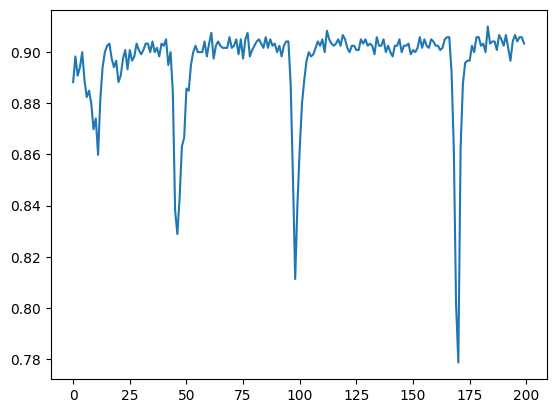

In [28]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [29]:
# Defining a function to take input of seed text from user and no. of words to be predicted

def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [30]:
# predicting or generating the poem with the seed text

seed_text = 'i am feeling good today'
next_words = 20

predict_words(seed_text, next_words)


1/1 [==============================] - 0s 19ms/step
i am feeling good today birches bend to left and right there a thousand again again a few christmas bowed a city had cents than


In [31]:
# saving the model

model.save('/content/drive/MyDrive/Colab Notebooks/NLP/poem_generator.h5') # Will create a HDF5 file of the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
